# Banknote Authentication

## K means clustering final project

*data from OpenML*



### Project goals

1. Describe the dataset: its size, number of features, data types, values, means and deviations. Are there are outliers? 
2. Visualise your data. This is optional, but it is beneficial to do for you and for your client. 
3. Evaluate the suitability of the given dataset for the unsupervised clustering task. Is the size of the dataset suitable? The k-means algorithm may struggle to produce good results if there's not enough training data. 
4. Is the number of features suitable? K-means will not work well if there are too many features, especially if the number of features exceeds the number of instances.
5. Will it be helpful to scale or standardise the data?

In [20]:
# Step 1: Load the given Banknote authentication dataset.  

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

banknote_data = pd.read_csv('Banknote-authentication-dataset.csv')

v1 = banknote_data['V1']
v2 = banknote_data['V2']

In [16]:
# Step 2: Calculate statistical measures, e.g. mean and standard deviation. 

#V1 values
v1_mean = np.mean(v1)
v1_st_dev = np.std(v1,0)
v1_min = v1.min()
v1_max = v1.max()
print("V1 Statistical Measures")
print("-----------------------")
print("mean:", v1_mean)
print("st dev:", v1_st_dev)
print("min:", v1_min)
print("max:", v1_max)
print("-----------------------\n\n")


#V2 values
v2_mean = np.mean(v2)
v2_st_dev = np.std(v2,0)
v2_min = v2.min()
v2_max = v2.max()
print("V2 Statistical Measures")
print("-----------------------")
print("mean:", v2_mean)
print("st dev:", v2_st_dev)
print("min:", v2_min)
print("max:", v2_max)
print("-----------------------")


V1 Statistical Measures
-----------------------
mean: 0.43373525728862977
st dev: 2.841726405206097
min: -7.0421
max: 6.8248
-----------------------


V2 Statistical Measures
-----------------------
mean: 1.9223531209912539
st dev: 5.866907488271993
min: -13.7731
max: 12.9516
-----------------------


Text(0.5, 1.0, 'Banknotes Authentication: V1/V2')

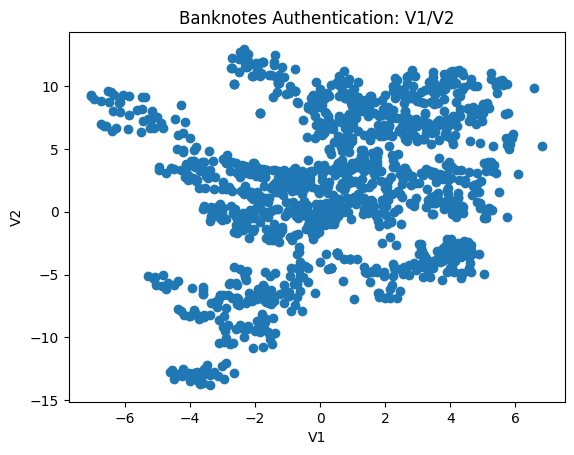

In [19]:
# Step 3: Visualise your data as you consider fit. 

plt.scatter(v1, v2)
plt.xlabel("V1")
plt.ylabel("V2")
plt.title("Banknotes Authentication: V1/V2")

#### Step 4: Evaluate if the given dataset is suitable for the K-Means clustering task.

This dataset does not seem too centred, and therefore may be suitable for the K-means clustering analysis. However, on initial observation, it does look more as if there are three groups, rather than the ideal 2 of genuine versus forged. Nonetheless, I will try the k-means clustering with n=2 before attempting n=3. It is also observed that the groupings are not circular, and so it may not work perfectly.

/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


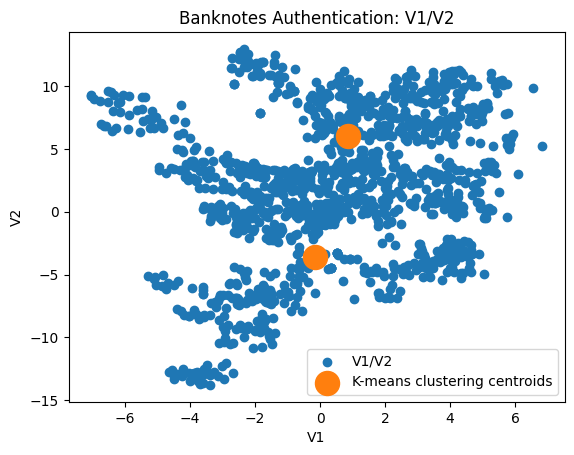

In [31]:
# K means clustering

v1_v2 = np.column_stack((v1,v2))

km_result = KMeans(n_clusters=2).fit(v1_v2)
clusters = km_result.cluster_centers_

plt.scatter(v1, v2)
plt.scatter(clusters[:,0], clusters[:,1], s=300)
plt.xlabel("V1")
plt.ylabel("V2")
plt.title("Banknotes Authentication: V1/V2")
plt.legend({"V1/V2", "K-means clustering centroids"})
plt.savefig('fig1')

### Comments

This shows two clusters, where the clusters have divided themselves into two horizontal groups. The values of the centroids appears consistent when the code is run several times, so indicating that they are a good representation. 

However, to be clearer about the division and which points are allocated to which cluster, I explored options online. Using the [seaborn](https://seaborn.pydata.org/) package appears to help with data visualisation such as this. 

/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


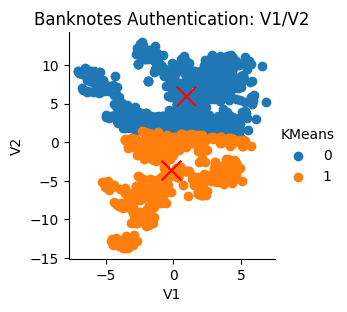

In [32]:
import seaborn as sb


graph = plt.subplots(3, 3, figsize=(16, 16))

for i in range (10):
    km_result = KMeans(n_clusters=2).fit(v1_v2)
    banknote_data['KMeans'] = km_result.labels_
    clusters = km_result.cluster_centers_
    graph = sb.FacetGrid(data = banknote_data, hue = 'KMeans')
    graph.map(plt.scatter, 'V1', 'V2')
    graph.add_legend();
    plt.scatter(clusters[:,0], clusters[:,1], s=200, marker='x', c='r')
    plt.title("Banknotes Authentication: V1/V2")
plt.tight_layout()

In [57]:
banknote_data.groupby('KMeans').describe()

V1                                                                \
        count      mean       std     min      25%      50%     75%     max   
KMeans                                                                        
0       599.0 -0.125914  2.655152 -5.2943 -2.18825 -0.65767  2.0159  5.7403   
1       773.0  0.867409  2.908508 -7.0421 -0.95403  1.11660  3.1896  6.8248   

           V2                                                                   
        count      mean       std      min      25%     50%       75%      max  
KMeans                                                                          
0       599.0 -3.479989  3.834604 -13.7731 -6.30615 -2.9363 -0.066226   1.6327  
1       773.0  6.108644  3.096698   1.0367  3.25700  6.1437  8.794400  12.9516

### Comments

When I looked up the data visualisation and found seaborn, I also discovered that there is a means of describing KMeans, which I have run above. 

This indicates that in the two clusters, one has 599 points and the other has 773, which shows a slightly greater weight being given to the first cluster - this may be reflecting the dataset which may have slightly more of one group than another, or may be a drawback to this iteration of KMeans clustering. 